In [23]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

In [24]:
def tsmom(data,months):
    vol=pd.rolling_std(data.pct_change(),24)*math.sqrt(12)
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position

def calc_pnl(position,data):
    return position*data.pct_change().shift(1)

def calc_Sharpe(pnl,N=12):
    return np.sqrt(N) * pnl.mean() / pnl.std()

def ew_portfolio_pnl(pnl):
    return pnl.divide(pnl.count(axis=1),axis=0).sum(axis=1)

In [54]:
data=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
markets=pd.read_csv('contracts.csv',index_col=0)
volume=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='sum')
fx=pd.read_csv('currency.csv',index_col=0,parse_dates=['DATE'])

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  app.launch_new_instance()


In [26]:
data=data.dropna(axis=1)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=24,center=False).std()
  from IPython.kernel.zmq import kernelapp as app


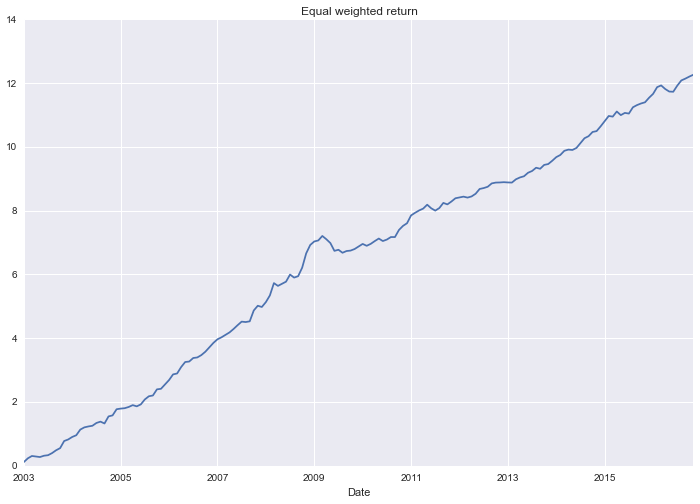

In [55]:
pos=tsmom(data,12)
pnl=calc_pnl(pos,data)
sr=calc_Sharpe(pnl)
ew_portfolio_pnl(pnl)['2003':].cumsum().plot(title='Equal weighted return')

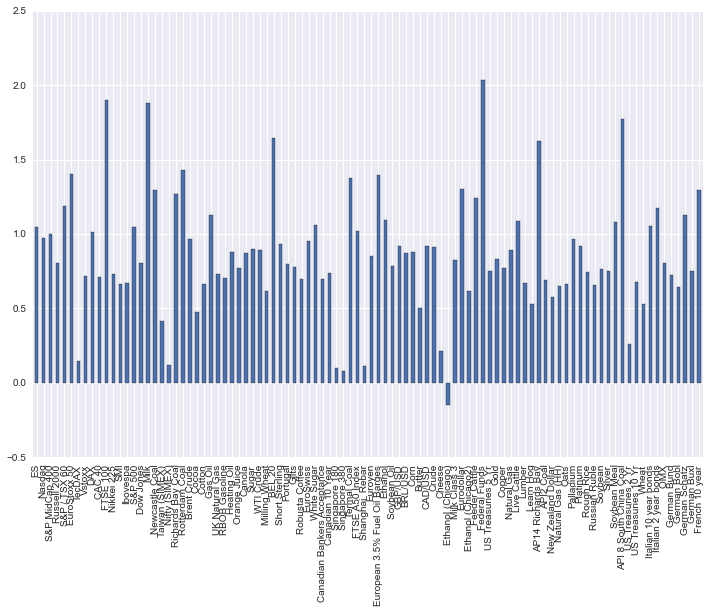

In [56]:
sr.dropna().plot(kind='bar')

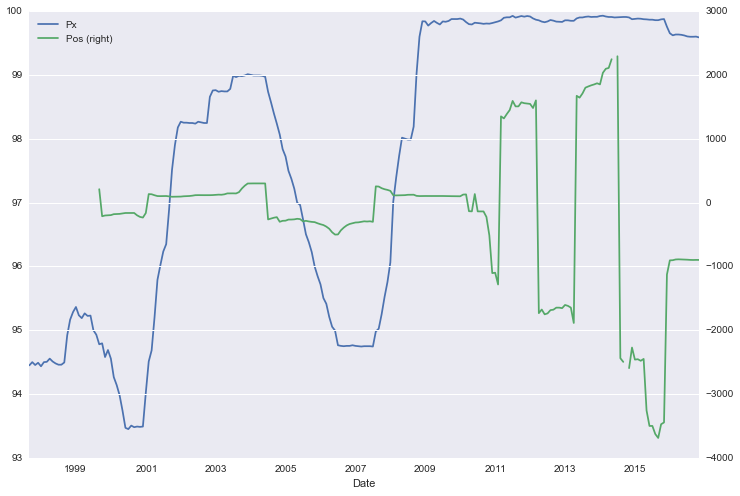

In [57]:
sr.loc[sr<0]
m='Federal Funds'
q=pd.DataFrame()
q['Px']=data[m].dropna()
q['Pos']=pos[m]
q.plot(secondary_y='Pos')

In [84]:
df=pd.DataFrame()
df['SR']=sr
df['Volume']=np.log((volume*data+0.01).mean())
s=pd.Series()
for x in df.T.columns:
    try:
        s[x]=markets.T[x].Sector      
    except:
        print x
df['Sector']=s

ES
RBOB Gasoline


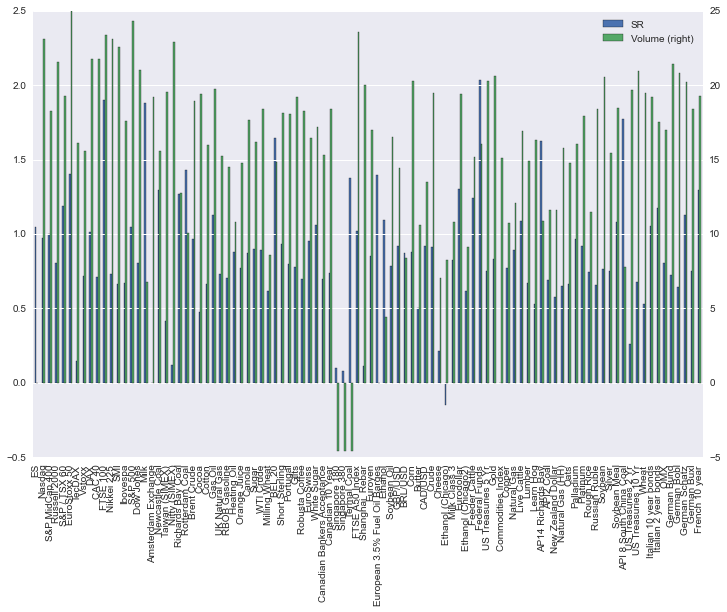

In [85]:
df.plot(kind='bar',secondary_y='Volume')

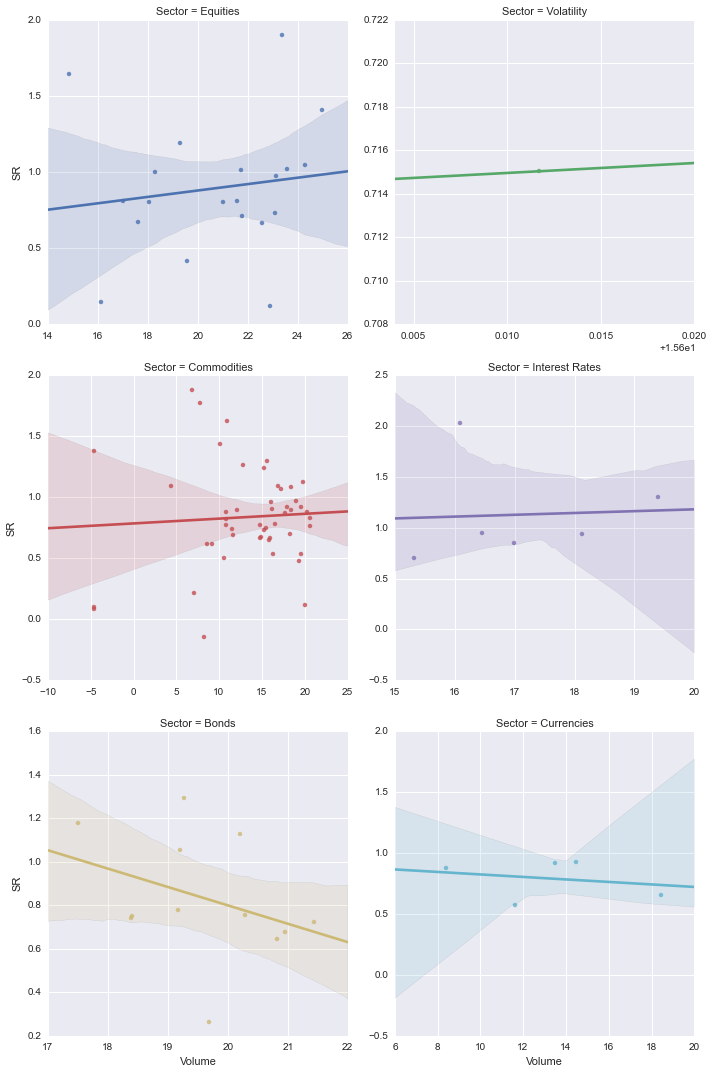

In [86]:
sns.lmplot(x='Volume',fit_reg=True,y='SR',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=df.loc[df.Volume<1e10])

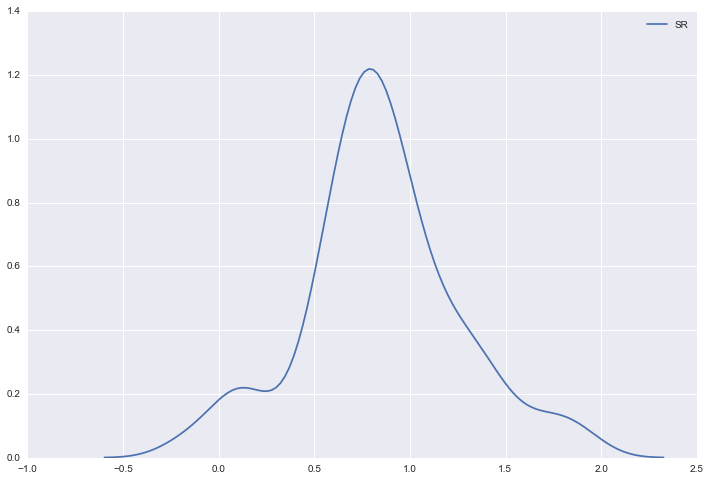

In [87]:
sns.kdeplot(df.loc[df.Sector=='Commodities'].SR)

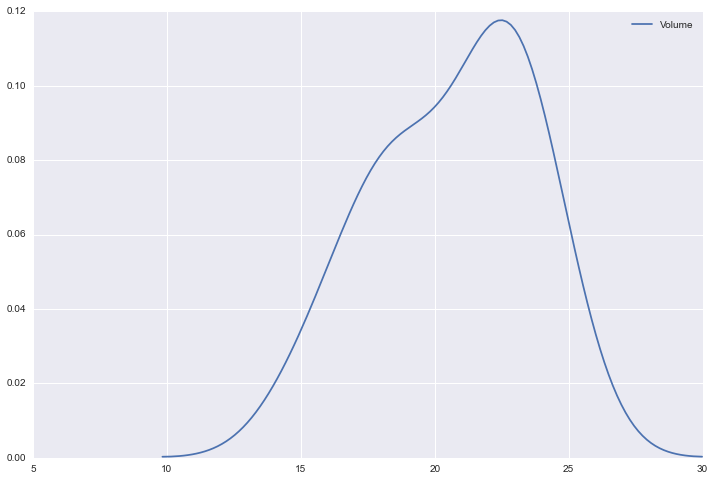

In [88]:
sns.kdeplot(df.loc[df.Sector=='Equities'].Volume)

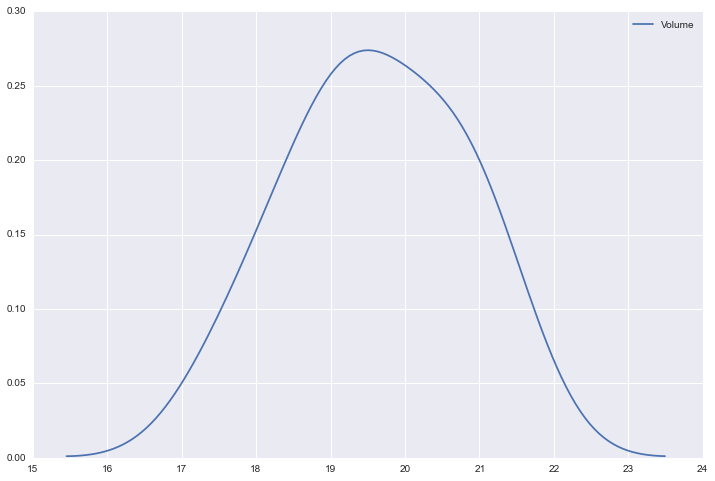

In [89]:
sns.kdeplot(df.loc[df.Sector=='Bonds'].Volume)

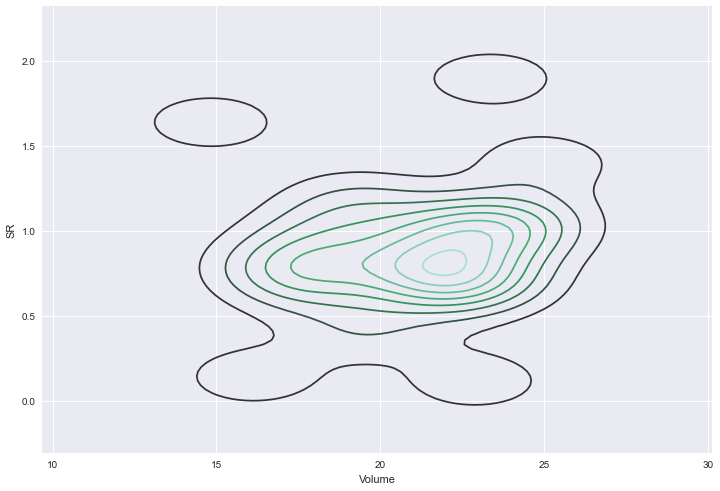

In [90]:
t=df.loc[df.Sector=='Equities'].dropna(axis=0)
sns.kdeplot(t.Volume,t.SR)

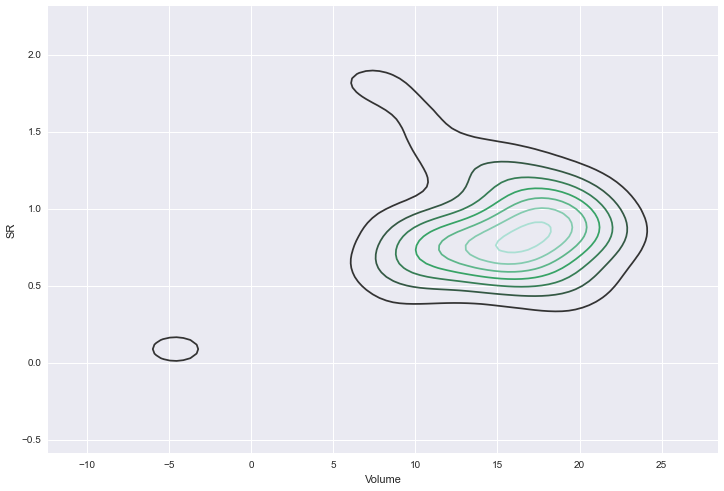

In [91]:
t=df.loc[df.Sector=='Commodities'].dropna(axis=0)
sns.kdeplot(t.Volume,t.SR)

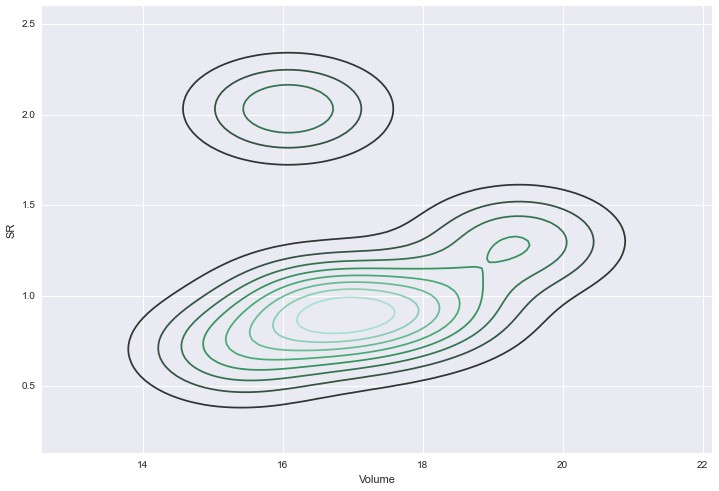

In [92]:
t=df.loc[df.Sector=='Interest Rates'].dropna(axis=0)
sns.kdeplot(t.Volume,t.SR)

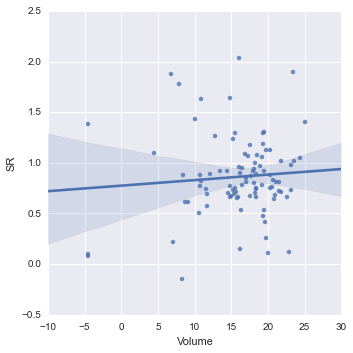

In [93]:
sns.lmplot(data=df,x='Volume',fit_reg=True,y='SR')